## Predicting Iris pant type
In this post, I show an example of using Deep Learning techniques with PyTorch to predict iris plant type (Setosa, Versicolour, Virginica). The example assume that you are familiar with the theory of the neural networks and Python.

I will use a Muli-Layer Neural Networks and the Fisher Iris dataset which contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2 and the latter are NOT linearly separable from each other.

### Overview
- Requirements
- Load Python modules and dataset
- Prepare data
- Create model
- Train Model
- Evaluate Model
- Save and load model weights to predict new cases

### 1- Requirements
- Python 3.6
- Pandas
- Numpy
- Matplotlib
- PyTorch
- Scikit Learn
- Iris dataset

### 2- Load Python modules and dataset

In [1]:
# import package
import pandas as pd
import numpy as np
import torch
import pickle

import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from torch.autograd import Variable

# set numpy seed for reproducibility
np.random.seed(seed=123)

In [2]:
# load dataset
dataset = pd.read_csv("../data/iris.csv", sep=',', header=None)
dataset.columns = ['f1', 'f2', 'f3', 'f4', 'species']
dataset.head()

,f1,f2,f3,f4,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3- Prepare data

In [3]:
# encode lables (0 = setosa, 1 = versicolor, 2 = virginica) 
dataset.loc[dataset.species=='Iris-setosa', 'species'] = 0
dataset.loc[dataset.species=='Iris-versicolor', 'species'] = 1
dataset.loc[dataset.species=='Iris-virginica', 'species'] = 2

# show dataset
dataset.describe()

,f1,f2,f3,f4,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# get numpy array
dataset = dataset.values
dataset[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [5]:
# split dataset to train (80%) and test (20%) 
train_size = 0.8
train_size = int(len(dataset) * train_size)
np.random.shuffle(dataset)
train, test = dataset[:train_size,:], dataset[train_size:,:]
print ('Dataset size: {0}. Train size: {1} - Test size: {2}'.format(len(dataset), len(train), len(test)))

Dataset size: 150. Train size: 120 - Test size: 30


In [6]:
# get train and set data into numpy nd.array
x_train = train[:,:4]
x_test = test[:,:4]
y_train = train[:,4]
y_test = test[:,4]

### 4- Create model

In [7]:
# set model parameters
batch_size = len(x_train) 
num_epochs = 1000
learning_rate = 0.01
dim_in = 4
dim_out = 3
batch_no = int(len(x_train) / batch_size)

In [8]:
# create network architecture
class Multiclass_Classifier(nn.Module):
    def __init__(self):
        super(Multiclass_Classifier, self).__init__()
        self.predictor = nn.Sequential(
            nn.Linear(dim_in, 100),
            nn.ReLU(),
            nn.Linear(100, dim_out),
            nn.Softmax(dim=1))

    def forward(self, x):
        x = self.predictor(x)
        return x

# create network
net = Multiclass_Classifier()

In [9]:
# define loss 
criterion = torch.nn.CrossEntropyLoss()

In [10]:
# define optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

### 5- Train Model

In [11]:
running_loss = 0.0
epoch_loss = []

for epoch in range(num_epochs):
    
    for i in range(batch_no):
        # get mini-batch of train data
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.tensor(x_train[start:end]).float())
        labels = Variable(torch.tensor(y_train[start:end]).long())
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)
        
        # backward
        loss = criterion(outputs, labels)
        loss.backward()
        
        # optimize (update weights)
        optimizer.step()

        # increment epoch loss
        running_loss += loss.item()
        
    # show loss after each 100 epoch
    if epoch % 100 == 0:
        print('Epoch {}'.format(epoch+1), "loss: ", running_loss)
    
    # initialize loss
    epoch_loss.append(running_loss)
    running_loss = 0.0  

Epoch 1 loss:  1.0992405414581299
Epoch 101 loss:  0.8566237092018127
Epoch 201 loss:  0.8024775981903076
Epoch 301 loss:  0.7713434100151062
Epoch 401 loss:  0.7469139099121094
Epoch 501 loss:  0.7266111969947815
Epoch 601 loss:  0.7094002962112427
Epoch 701 loss:  0.6947469115257263
Epoch 801 loss:  0.6822843551635742
Epoch 901 loss:  0.6716582775115967


### 6- Evaluate Model

In [12]:
# get accuracy on test set
preds = net(torch.tensor(x_test).float())
y_proba, y_pred = torch.max(preds, 1)

print (accuracy_score(y_test, y_pred))

0.9333333333333333


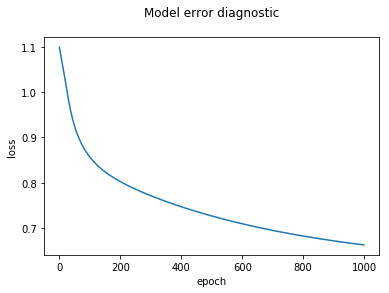

In [13]:
# show loss
plt.plot(epoch_loss)
plt.title('Model error diagnostic\n')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### 7- Save and load model weights to predict new cases

In [14]:
# Save model
pickle.dump(net, open("../model/multiclass_classifier.p", "wb"))

# load model
loaded_net = pickle.load(open("../model/multiclass_classifier.p", "rb"))

# make prediction on trained model
pred = net(torch.tensor([[ 3., 0., 1., 1.]]).float())
y_proba, y_pred = torch.max(pred, 1)
print ("predict: {0} with proba: {1}".format(y_pred.detach().numpy()[0], y_proba.detach().numpy()[0]))

# make prediction on loaded model
pred = loaded_net(torch.tensor([[ 3., 0., 1., 1.]]).float())
y_proba, y_pred = torch.max(pred, 1)
print ("predict: {0} with proba: {1}".format(y_pred.detach().numpy()[0], y_proba.detach().numpy()[0]))

predict: 1 with proba: 0.6742026805877686
predict: 1 with proba: 0.6742026805877686
